In [ ]:
import pandas as pd
df = pd.read_excel('disease.xlsx')

In [ ]:
df.head()

,Disease,Age,Gender,Smoker status
0,diseased,43,Male,Smoker
1,not diseased,18,Male,Smoker
2,diseased,22,Female,Non-smoker
3,diseased,25,Male,Non-smoker
4,not diseased,45,Female,Smoker


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Disease'] = le.fit_transform(df['Disease'])
df['Smoker status'] = le.fit_transform(df['Smoker status'])

In [ ]:
feature_cols = ['Age','Gender','Smoker status']
x = df[feature_cols]
y = df['Disease']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(28, 3)

(28,)

(8, 3)

(8,)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix:',conf_mat)
Accuracy = metrics.accuracy_score(y_test,y_pred)
print('Accuracy:',Accuracy)

confusion matrix: [[5 1]
 [0 2]]
Accuracy: 0.875


<Axes: xlabel='Predicted', ylabel='Actual'>

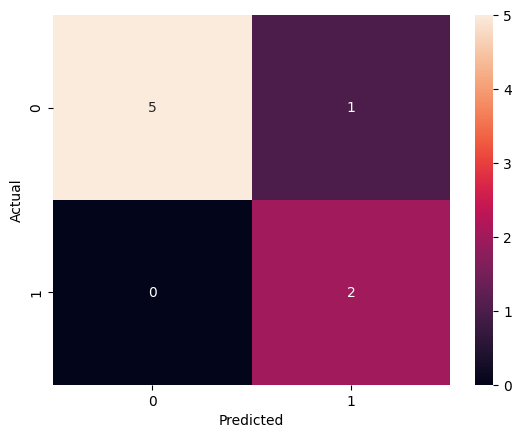

In [ ]:
import seaborn as sn
conf_mat = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(conf_mat,annot=True)